## Notebook to create plot for a single year

In [1]:
## conda environment Weather_Prediction

import os
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
pd.set_option('display.precision', 15)

In [2]:
year=str(2010)

PATH_1=os.path.join('..','Results', 'final_dataset_103_features_90th_percentile.pkl') ## read the data
df=pd.read_pickle(PATH_1)
df = df.drop(['MeanLifeExpectency', 'year'], axis=1)
df

,fips,2m dew point temperature,2m temperature,Black carbon AOD at 550 nm,Dust AOD at 550 nm,Land-sea mask,Mean sea level pressure,Organic matter AOD at 550 nm,PM$_1$,PM$_{2.5}$,PM$_{10}$,Sea salt AOD at 550 nm,Sulphate AOD at 550 nm,Surface geopotential,Surface pressure,Total AOD at 469 nm,Total AOD at 550 nm,Total AOD at 670 nm,Total AOD at 865 nm,Total AOD at 1240 nm,Total column carbon monoxide,Total column ethane,Total column formaldehyde,Total column hydrogen peroxide,Total column hydroxyl radical,Total column isoprene,Total column methane,Total column nitric acid,Total column nitrogen dioxide,Total column nitrogen monoxide,Total column ozone,Total column peroxyacetyl nitrate,Total column propane,Total column sulphur dioxide,Total column water vapour,Carbon monoxide,Dust aerosol (0.03-0.55 µm) mixing ratio,Dust aerosol (0.55-0.9 µm) mixing ratio,Dust aerosol (0.9-20 µm) mixing ratio,Ethane,Formaldehyde,Hydrogen peroxide,Hydrophilic black carbon aerosol mixing ratio,Hydrophilic organic matter aerosol mixing ratio,Hydrophobic black carbon aerosol mixing ratio,Hydrophobic organic matter aerosol mixing ratio,Hydroxyl radical,Isoprene,Nitric acid,Nitrogen dioxide,Nitrogen monoxide,Ozone,Peroxyacetyl nitrate,Propane,Sea salt aerosol (0.03-0.5 µm) mixing ratio,Sea salt aerosol (0.5-5 µm) mixing ratio,Sea salt aerosol (5-20 µm) mixing ratio,Specific humidity,Sulphate aerosol mixing ratio,Sulphur dioxide,Temperature,"Leaf area index, high vegetation","Leaf area index, low vegetation",Snow albedo,Snow depth,Total column water,Vertically integrated mass of dust aerosol (0.03-0.55 µm),Vertically integrated mass of dust aerosol (0.55-9 µm),Vertically integrated mass of dust aerosol (9-20 µm),Vertically integrated mass of hydrophilic black carbon aerosol,Vertically integrated mass of hydrophilic organic matter aerosol,Vertically integrated mass of hydrophobic black carbon aerosol,Vertically integrated mass of hydrophobic organic matter aerosol,Vertically integrated mass of sea salt aerosol (0.03-0.5 µm),Vertically integrated mass of sea salt aerosol (0.5-5 µm),Vertically integrated mass of sea salt aerosol (5-20 µm),Vertically integrated mass of sulphate aerosol,Vertically integrated mass of sulphur dioxide,Relative humidity,10m wind speed,Wet bulb temperature,FoT Carbonmonoxide above 90ᵗʰ percentile,FoT Ethane above 90ᵗʰ percentile,FoT Formaldehyde above 90ᵗʰ percentile,FoT Hydroxyl radical above 90ᵗʰ percentile,FoT Isoprene above 90ᵗʰ percentile,FoT Peroxyacetyl Nitrate above 90ᵗʰ percentile,FoT Nitric acid above 90ᵗʰ percentile,FoT Nitrogen dioxide above 90ᵗʰ percentile,FoT Nitrogen monoxide above 90ᵗʰ percentile,FoT Ozone above 90ᵗʰ percentile,FoT Hydrogen peroxide above 90ᵗʰ percentile,FoT PM$_{10}$ above 90ᵗʰ percentile,FoT PM$_{1}$ above 90ᵗʰ percentile,FoT PM$_{2.5}$ above 90ᵗʰ percentile,FoT Propane above 90ᵗʰ percentile,FoT Sulphur dioxide above 90ᵗʰ percentile,FoT Temperature above 90ᵗʰ percentile,FoT Temperature below 10ᵗʰ percentile,FoT PM$_{10}$ above EPA threshold,FoT Temperature above 90 $\mathrm{^o F}$,FoT Temperature below 0 $\mathrm{^o C}$,FoT PM$_{2.5}$ above EPA threshold
0,1001,285.629269414872169,290.863352214209158,0.00757124815486,0.010371692890225,0.986464531564209,101746.46078524258337,0.097522246908886,0.000000015615338,0.000000019601377,0.000000027192044,0.00860619294015,0.112170314070482,1368.670051439976305,100086.817007783130975,0.288798537560071,0.236241944078782,0.180380990078313,0.123618863685572,0.069164993038643,0.000984550381998,0.000003862356441,0.000003599970514,0.000008836077454,0.000000004853489,0.000001984446001,0.009753834615672,0.000007246513254,0.000004130302193,0.000000542480041,0.006426156201957,0.000008713431766,0.00000074020297,0.000004737026637,25.902900677695214,0.000000230284119,0.000000000654884,0.000000001134462,0.000000000403961,0.000000000705993,0.000000003513651,0.000000000741261,0.00000000022451,0.000000010096395,0.000000000254529,0.000000005847693,0.000000000000028,0.000000014

In [3]:
PATH_2=os.path.join('..','Results','CAMS_with_LE', 'LE_'+year +'.csv') ## read the life expectancy data
le=pd.read_csv(PATH_2)
le

,location_name,fips,year,MeanLifeExpectency
0,Autauga County (Alabama),1001,2010,75.728489350000004
1,Baldwin County (Alabama),1003,2010,77.826607740000000
2,Barbour County (Alabama),1005,2010,75.841973350000004
3,Bibb County (Alabama),1007,2010,73.705431910000001
4,Blount County (Alabama),1009,2010,75.753407339999995
...,...,...,...,...
3122,Sweetwater County (Wyoming),56037,2010,77.582421690000004
3123,Teton County (Wyoming),56039,2010,83.771012389999996
3124,Uinta County (Wyoming),56041,2010,77.836525859999995
3125,Washakie County (Wyoming),56043,2010,78.674179870000003


In [4]:
## merge life expectency data with the variables by fips
    
final_df=le.merge(df,how='left', on='fips')
final_df=final_df.dropna()
final_df = final_df.drop(['location_name', 'year'], axis=1)
final_df

,fips,MeanLifeExpectency,2m dew point temperature,2m temperature,Black carbon AOD at 550 nm,Dust AOD at 550 nm,Land-sea mask,Mean sea level pressure,Organic matter AOD at 550 nm,PM$_1$,PM$_{2.5}$,PM$_{10}$,Sea salt AOD at 550 nm,Sulphate AOD at 550 nm,Surface geopotential,Surface pressure,Total AOD at 469 nm,Total AOD at 550 nm,Total AOD at 670 nm,Total AOD at 865 nm,Total AOD at 1240 nm,Total column carbon monoxide,Total column ethane,Total column formaldehyde,Total column hydrogen peroxide,Total column hydroxyl radical,Total column isoprene,Total column methane,Total column nitric acid,Total column nitrogen dioxide,Total column nitrogen monoxide,Total column ozone,Total column peroxyacetyl nitrate,Total column propane,Total column sulphur dioxide,Total column water vapour,Carbon monoxide,Dust aerosol (0.03-0.55 µm) mixing ratio,Dust aerosol (0.55-0.9 µm) mixing ratio,Dust aerosol (0.9-20 µm) mixing ratio,Ethane,Formaldehyde,Hydrogen peroxide,Hydrophilic black carbon aerosol mixing ratio,Hydrophilic organic matter aerosol mixing ratio,Hydrophobic black carbon aerosol mixing ratio,Hydrophobic organic matter aerosol mixing ratio,Hydroxyl radical,Isoprene,Nitric acid,Nitrogen dioxide,Nitrogen monoxide,Ozone,Peroxyacetyl nitrate,Propane,Sea salt aerosol (0.03-0.5 µm) mixing ratio,Sea salt aerosol (0.5-5 µm) mixing ratio,Sea salt aerosol (5-20 µm) mixing ratio,Specific humidity,Sulphate aerosol mixing ratio,Sulphur dioxide,Temperature,"Leaf area index, high vegetation","Leaf area index, low vegetation",Snow albedo,Snow depth,Total column water,Vertically integrated mass of dust aerosol (0.03-0.55 µm),Vertically integrated mass of dust aerosol (0.55-9 µm),Vertically integrated mass of dust aerosol (9-20 µm),Vertically integrated mass of hydrophilic black carbon aerosol,Vertically integrated mass of hydrophilic organic matter aerosol,Vertically integrated mass of hydrophobic black carbon aerosol,Vertically integrated mass of hydrophobic organic matter aerosol,Vertically integrated mass of sea salt aerosol (0.03-0.5 µm),Vertically integrated mass of sea salt aerosol (0.5-5 µm),Vertically integrated mass of sea salt aerosol (5-20 µm),Vertically integrated mass of sulphate aerosol,Vertically integrated mass of sulphur dioxide,Relative humidity,10m wind speed,Wet bulb temperature,FoT Carbonmonoxide above 90ᵗʰ percentile,FoT Ethane above 90ᵗʰ percentile,FoT Formaldehyde above 90ᵗʰ percentile,FoT Hydroxyl radical above 90ᵗʰ percentile,FoT Isoprene above 90ᵗʰ percentile,FoT Peroxyacetyl Nitrate above 90ᵗʰ percentile,FoT Nitric acid above 90ᵗʰ percentile,FoT Nitrogen dioxide above 90ᵗʰ percentile,FoT Nitrogen monoxide above 90ᵗʰ percentile,FoT Ozone above 90ᵗʰ percentile,FoT Hydrogen peroxide above 90ᵗʰ percentile,FoT PM$_{10}$ above 90ᵗʰ percentile,FoT PM$_{1}$ above 90ᵗʰ percentile,FoT PM$_{2.5}$ above 90ᵗʰ percentile,FoT Propane above 90ᵗʰ percentile,FoT Sulphur dioxide above 90ᵗʰ percentile,FoT Temperature above 90ᵗʰ percentile,FoT Temperature below 10ᵗʰ percentile,FoT PM$_{10}$ above EPA threshold,FoT Temperature above 90 $\mathrm{^o F}$,FoT Temperature below 0 $\mathrm{^o C}$,FoT PM$_{2.5}$ above EPA threshold
0,1001,75.728489350000004,285.629269414872169,290.863352214209158,0.00757124815486,0.010371692890225,0.986464531564209,101746.46078524258337,0.097522246908886,0.000000015615338,0.000000019601377,0.000000027192044,0.00860619294015,0.112170314070482,1368.670051439976305,100086.817007783130975,0.288798537560071,0.236241944078782,0.180380990078313,0.123618863685572,0.069164993038643,0.000984550381998,0.000003862356441,0.000003599970514,0.000008836077454,0.000000004853489,0.000001984446001,0.009753834615672,0.000007246513254,0.000004130302193,0.000000542480041,0.006426156201957,0.000008713431766,0.00000074020297,0.000004737026637,25.902900677695214,0.000000230284119,0.000000000654884,0.000000001134462,0.000000000403961,0.000000000705993,0.000000003513651,0.000000000741261,0.00000000022451,0.000000010096395,0.000000000254529,0.0000000

In [5]:
## Lets load the county shapefile
year=str(2010)
SHAPE_PATH = os.path.join('..','Shapefiles','county_shapefiles','2010_county_shapefile','gz_2010_us_050_00_500k.shp')
county_gdf = gpd.read_file(SHAPE_PATH)

county_gdf

,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
0,0500000US01029,01,029,Cleburne,County,560.100000000000023,"POLYGON ((-85.38872 33.91304, -85.38088 33.873..."
1,0500000US01031,01,031,Coffee,County,678.971999999999980,"POLYGON ((-86.03044 31.61894, -86.00408 31.619..."
2,0500000US01037,01,037,Coosa,County,650.926000000000045,"POLYGON ((-86.00928 33.10164, -86.00917 33.090..."
3,0500000US01039,01,039,Covington,County,1030.455999999999904,"POLYGON ((-86.34851 30.99434, -86.35023 30.994..."
4,0500000US01041,01,041,Crenshaw,County,608.840000000000032,"POLYGON ((-86.14699 31.68046, -86.14711 31.663..."
...,...,...,...,...,...,...,...
3216,0500000US72131,72,131,San Sebastián,Muno,70.423000000000002,"POLYGON ((-66.90748 18.25314, -66.90739 18.253..."
3217,0500000US72133,72,133,Santa Isabel,Muno,34.023000000000003,"POLYGON ((-66.37968 17.94398, -66.38029 17.943..."
3218,0500000US72137,72,137,Toa Baja,Muno,23.241000000000000,"MULTIPOLYGON (((-66.13957 18.46232, -66.13956 ..."
3219,0500000US72139,72,139,Trujillo Alto,Muno,20.763999999999999,"POLYGON ((-66.02917 18.3759, -66.02828 18.3768..."


In [6]:
## lets create the fips column in the dataframe which is the sum of state and county both as dtype string.
## Note: not a numerical sum
## This step is necessary because there can be several counties with idential names. 

county_gdf['fips']=county_gdf['STATE'] + county_gdf['COUNTY']
county_gdf.dtypes
## convert the data type
county_gdf['fips']=county_gdf['fips'].astype(str).astype(int)
county_gdf.head()

,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry,fips
0,0500000US01029,01,029,Cleburne,County,560.100000000000023,"POLYGON ((-85.38872 33.91304, -85.38088 33.873...",1029
1,0500000US01031,01,031,Coffee,County,678.971999999999980,"POLYGON ((-86.03044 31.61894, -86.00408 31.619...",1031
2,0500000US01037,01,037,Coosa,County,650.926000000000045,"POLYGON ((-86.00928 33.10164, -86.00917 33.090...",1037
3,0500000US01039,01,039,Covington,County,1030.455999999999904,"POLYGON ((-86.34851 30.99434, -86.35023 30.994...",1039
4,0500000US01041,01,041,Crenshaw,County,608.840000000000032,"POLYGON ((-86.14699 31.68046, -86.14711 31.663...",1041


In [7]:
## load state shapefile

SHAPE_PATH = os.path.join('../Shapefiles','state_shapefile','cb_2018_us_state_500k.shp')
state_shape = gpd.read_file(SHAPE_PATH)

print('The CRS of the SHAPE file is:', state_shape.crs)
## include only CONUS shapefile

remove_state = ['Alaska', 'District of Columbia', 'American Samoa', 'United States Virgin Islands', 'Hawaii', 'Guam', 
                  'Commonwealth of the Northern Mariana Islands', 'Puerto Rico' ]

# Remove rows where the 'NAME' column contains any value from strings
state_shape = state_shape[~state_shape['NAME'].isin(remove_state)]
state_shape.head()

The CRS of the SHAPE file is: EPSG:4269


,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00256 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.6432 38.16909, -82.643 38.16956,..."


In [8]:
gpd_df = pd.merge(county_gdf, final_df, on='fips', how='left') 
gpd_df= gpd_df.dropna()
gpd_df
## It is VERY IMPORTANT that the left dataframe that is merged is a Geopandas Dataframe
## Not pandas dataframe. While a Geopandas dataframe can be easily plotted, a pandas  
## even if it consists Geometry column, pandas will not recognize it and it will not be plotted

,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry,fips,MeanLifeExpectency,2m dew point temperature,2m temperature,Black carbon AOD at 550 nm,Dust AOD at 550 nm,Land-sea mask,Mean sea level pressure,Organic matter AOD at 550 nm,PM$_1$,PM$_{2.5}$,PM$_{10}$,Sea salt AOD at 550 nm,Sulphate AOD at 550 nm,Surface geopotential,Surface pressure,Total AOD at 469 nm,Total AOD at 550 nm,Total AOD at 670 nm,Total AOD at 865 nm,Total AOD at 1240 nm,Total column carbon monoxide,Total column ethane,Total column formaldehyde,Total column hydrogen peroxide,Total column hydroxyl radical,Total column isoprene,Total column methane,Total column nitric acid,Total column nitrogen dioxide,Total column nitrogen monoxide,Total column ozone,Total column peroxyacetyl nitrate,Total column propane,Total column sulphur dioxide,Total column water vapour,Carbon monoxide,Dust aerosol (0.03-0.55 µm) mixing ratio,Dust aerosol (0.55-0.9 µm) mixing ratio,Dust aerosol (0.9-20 µm) mixing ratio,Ethane,Formaldehyde,Hydrogen peroxide,Hydrophilic black carbon aerosol mixing ratio,Hydrophilic organic matter aerosol mixing ratio,Hydrophobic black carbon aerosol mixing ratio,Hydrophobic organic matter aerosol mixing ratio,Hydroxyl radical,Isoprene,Nitric acid,Nitrogen dioxide,Nitrogen monoxide,Ozone,Peroxyacetyl nitrate,Propane,Sea salt aerosol (0.03-0.5 µm) mixing ratio,Sea salt aerosol (0.5-5 µm) mixing ratio,Sea salt aerosol (5-20 µm) mixing ratio,Specific humidity,Sulphate aerosol mixing ratio,Sulphur dioxide,Temperature,"Leaf area index, high vegetation","Leaf area index, low vegetation",Snow albedo,Snow depth,Total column water,Vertically integrated mass of dust aerosol (0.03-0.55 µm),Vertically integrated mass of dust aerosol (0.55-9 µm),Vertically integrated mass of dust aerosol (9-20 µm),Vertically integrated mass of hydrophilic black carbon aerosol,Vertically integrated mass of hydrophilic organic matter aerosol,Vertically integrated mass of hydrophobic black carbon aerosol,Vertically integrated mass of hydrophobic organic matter aerosol,Vertically integrated mass of sea salt aerosol (0.03-0.5 µm),Vertically integrated mass of sea salt aerosol (0.5-5 µm),Vertically integrated mass of sea salt aerosol (5-20 µm),Vertically integrated mass of sulphate aerosol,Vertically integrated mass of sulphur dioxide,Relative humidity,10m wind speed,Wet bulb temperature,FoT Carbonmonoxide above 90ᵗʰ percentile,FoT Ethane above 90ᵗʰ percentile,FoT Formaldehyde above 90ᵗʰ percentile,FoT Hydroxyl radical above 90ᵗʰ percentile,FoT Isoprene above 90ᵗʰ percentile,FoT Peroxyacetyl Nitrate above 90ᵗʰ percentile,FoT Nitric acid above 90ᵗʰ percentile,FoT Nitrogen dioxide above 90ᵗʰ percentile,FoT Nitrogen monoxide above 90ᵗʰ percentile,FoT Ozone above 90ᵗʰ percentile,FoT Hydrogen peroxide above 90ᵗʰ percentile,FoT PM$_{10}$ above 90ᵗʰ percentile,FoT PM$_{1}$ above 90ᵗʰ percentile,FoT PM$_{2.5}$ above 90ᵗʰ percentile,FoT Propane above 90ᵗʰ percentile,FoT Sulphur dioxide above 90ᵗʰ percentile,FoT Temperature above 90ᵗʰ percentile,FoT Temperature below 10ᵗʰ percentile,FoT PM$_{10}$ above EPA threshold,FoT Temperature above 90 $\mathrm{^o F}$,FoT Temperature below 0 $\mathrm{^o C}$,FoT PM$_{2.5}$ above EPA threshold
0,0500000US01029,01,029,Cleburne,County,560.100000000000023,"POLYGON ((-85.38872 33.91304, -85.38088 33.873...",1029,74.109806370000001,284.509095027111925,289.840968262331501,0.007453952441606,0.008957902456741,0.982726550315091,101763.099339391061221,0.1000678057093,0.000000017942014,0.000000022158961,0.000000030872656,0.007399905709539,0.123337173546634,2364.649207619223034,98903.018733902921667,0.302831178519684,0.247216708335653,0.187947139710613,0.127511351513454,0.069909338306762,0.000989623555119,0.000003891436631,0.000003442014238,0.000008115150559,0.000000004872254,0.000001579907683,0.0096334109436,0.000007630924923,0.000005151891319,0.00000067308886,0.006493967127634,0.000009135614177,0.000000775939129,0.000006918184061,24.06003799294233,0.000000248987147,0.00000000059

In [9]:
gpd_df.describe()

,CENSUSAREA,fips,MeanLifeExpectency,2m dew point temperature,2m temperature,Black carbon AOD at 550 nm,Dust AOD at 550 nm,Land-sea mask,Mean sea level pressure,Organic matter AOD at 550 nm,PM$_1$,PM$_{2.5}$,PM$_{10}$,Sea salt AOD at 550 nm,Sulphate AOD at 550 nm,Surface geopotential,Surface pressure,Total AOD at 469 nm,Total AOD at 550 nm,Total AOD at 670 nm,Total AOD at 865 nm,Total AOD at 1240 nm,Total column carbon monoxide,Total column ethane,Total column formaldehyde,Total column hydrogen peroxide,Total column hydroxyl radical,Total column isoprene,Total column methane,Total column nitric acid,Total column nitrogen dioxide,Total column nitrogen monoxide,Total column ozone,Total column peroxyacetyl nitrate,Total column propane,Total column sulphur dioxide,Total column water vapour,Carbon monoxide,Dust aerosol (0.03-0.55 µm) mixing ratio,Dust aerosol (0.55-0.9 µm) mixing ratio,Dust aerosol (0.9-20 µm) mixing ratio,Ethane,Formaldehyde,Hydrogen peroxide,Hydrophilic black carbon aerosol mixing ratio,Hydrophilic organic matter aerosol mixing ratio,Hydrophobic black carbon aerosol mixing ratio,Hydrophobic organic matter aerosol mixing ratio,Hydroxyl radical,Isoprene,Nitric acid,Nitrogen dioxide,Nitrogen monoxide,Ozone,Peroxyacetyl nitrate,Propane,Sea salt aerosol (0.03-0.5 µm) mixing ratio,Sea salt aerosol (0.5-5 µm) mixing ratio,Sea salt aerosol (5-20 µm) mixing ratio,Specific humidity,Sulphate aerosol mixing ratio,Sulphur dioxide,Temperature,"Leaf area index, high vegetation","Leaf area index, low vegetation",Snow albedo,Snow depth,Total column water,Vertically integrated mass of dust aerosol (0.03-0.55 µm),Vertically integrated mass of dust aerosol (0.55-9 µm),Vertically integrated mass of dust aerosol (9-20 µm),Vertically integrated mass of hydrophilic black carbon aerosol,Vertically integrated mass of hydrophilic organic matter aerosol,Vertically integrated mass of hydrophobic black carbon aerosol,Vertically integrated mass of hydrophobic organic matter aerosol,Vertically integrated mass of sea salt aerosol (0.03-0.5 µm),Vertically integrated mass of sea salt aerosol (0.5-5 µm),Vertically integrated mass of sea salt aerosol (5-20 µm),Vertically integrated mass of sulphate aerosol,Vertically integrated mass of sulphur dioxide,Relative humidity,10m wind speed,Wet bulb temperature,FoT Carbonmonoxide above 90ᵗʰ percentile,FoT Ethane above 90ᵗʰ percentile,FoT Formaldehyde above 90ᵗʰ percentile,FoT Hydroxyl radical above 90ᵗʰ percentile,FoT Isoprene above 90ᵗʰ percentile,FoT Peroxyacetyl Nitrate above 90ᵗʰ percentile,FoT Nitric acid above 90ᵗʰ percentile,FoT Nitrogen dioxide above 90ᵗʰ percentile,FoT Nitrogen monoxide above 90ᵗʰ percentile,FoT Ozone above 90ᵗʰ percentile,FoT Hydrogen peroxide above 90ᵗʰ percentile,FoT PM$_{10}$ above 90ᵗʰ percentile,FoT PM$_{1}$ above 90ᵗʰ percentile,FoT PM$_{2.5}$ above 90ᵗʰ percentile,FoT Propane above 90ᵗʰ percentile,FoT Sulphur dioxide above 90ᵗʰ percentile,FoT Temperature above 90ᵗʰ percentile,FoT Temperature below 10ᵗʰ percentile,FoT PM$_{10}$ above EPA threshold,FoT Temperature above 90 $\mathrm{^o F}$,FoT Temperature below 0 $\mathrm{^o C}$,FoT PM$_{2.5}$ above EPA threshold
count,52281.000000000000000,52281.000000000000000,52281.000000000000000,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.0,52281.000000000000000,52281.000000000000000,52281.000000000000000,52281.000000000000000,52281.000000000000000,52281.0

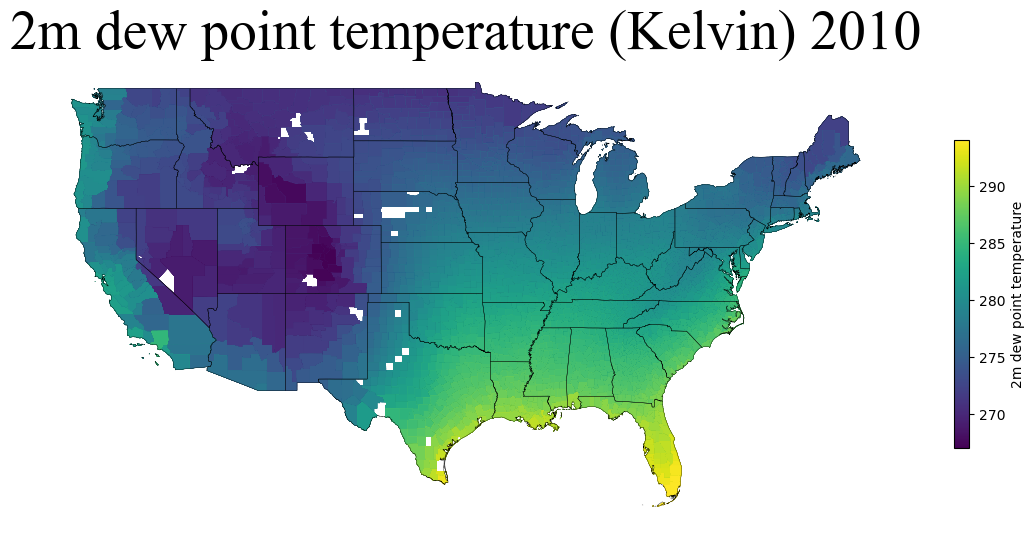

In [11]:
fig, ax = plt.subplots(1, figsize=(14, 8))
ax.axis('off') ## remove axis box from map 


## plot the county shape file
gpd_df.plot(ax=ax, column='2m dew point temperature', legend=True, legend_kwds={"label": "2m dew point temperature", 
                                                                               "shrink":0.50}, vmin=267, vmax=294)
hfont = {'fontname':'Times New Roman'}

## overlay state shapefile
state_shape.plot(facecolor='none', edgecolor='black', ax=ax, linewidth=0.25)

# add a title and annotation
ax.set_title('2m dew point temperature (Kelvin) '+year, **hfont, fontdict={'fontsize': '40', 'fontweight' : '1'})
#plt.savefig(year)
plt.show()